<a href="https://colab.research.google.com/github/shreeganeshasharma/ParticleSimulations/blob/main/Pure1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#D1 = 1; D2 = 10
___
https://journals.aps.org/pre/supplemental/10.1103/PhysRevE.105.014604
___

#Initialization

In [1]:
#necessary libraries
import time
import math
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
np.random.seed(2131)

#Brownian motion parameters
#Time step
dt = 0.001
#Number of steps
nums = 1000
#Number of particles
nump = 100000
#Boundary between media
R1 = 0.5
#Outer reflecting boundary
R2 = 1
#Diffusivity of inner medium
D1 = 1
#Diffusivity of outer medium
D2 = 10

#Radius of the target at the center
R = 0
R = R1/10
"""Get r0 value from paper - Giacomo uses an absorbing boundary at 0"""

#Parameters of the normal distribution
mean = 0
covar = 1

#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Random steps
Eps = np.random.normal(mean, covar, (nump, nums))
dX1s = np.sqrt(2*D1*dt)*Eps
dX2s = np.sqrt(2*D2*dt)*Eps

#nump particles starting at init
Init = np.tile(np.array([.2]), nump)

"""Initialize X[0] here - Can't do
Can initialize Y[0][:]
Initialize counts for t=0"""

#Hitting times if the target is hit
hittingTime = np.zeros(nump)

#Simulate Ito Convention

In [2]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      #Remove the particle once it hits the target
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels is presently in medium1 and travels without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is presently traveling in medium2 and travels without crossing the outer boundary
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 45.253093957901 seconds ---


#Plot

Mean First Passage Time =  67.94414922893712


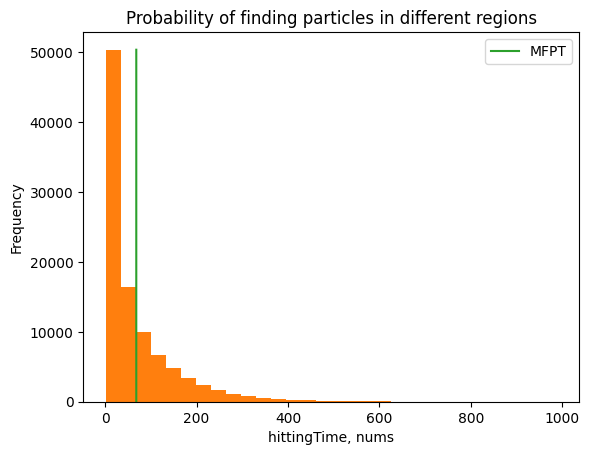

In [3]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

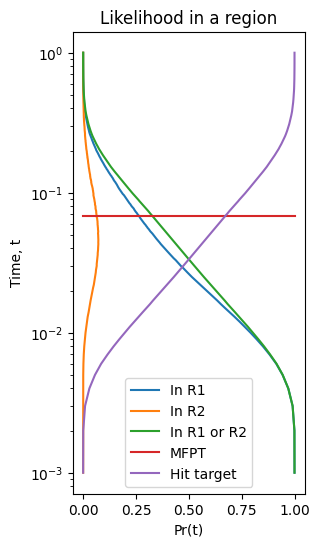

In [4]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

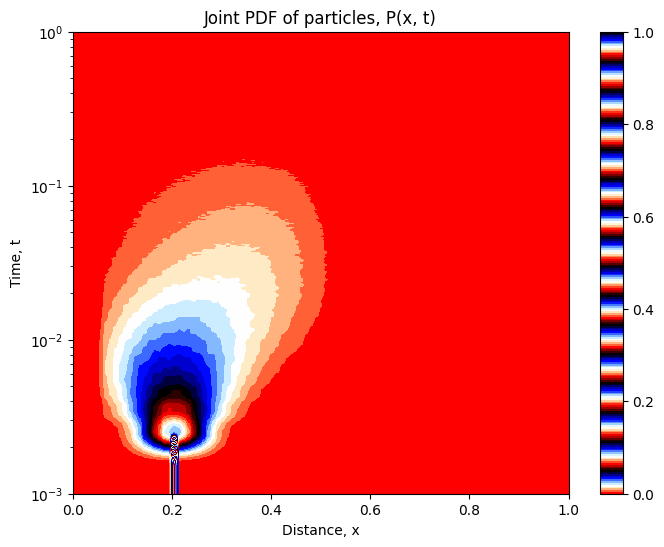

In [5]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

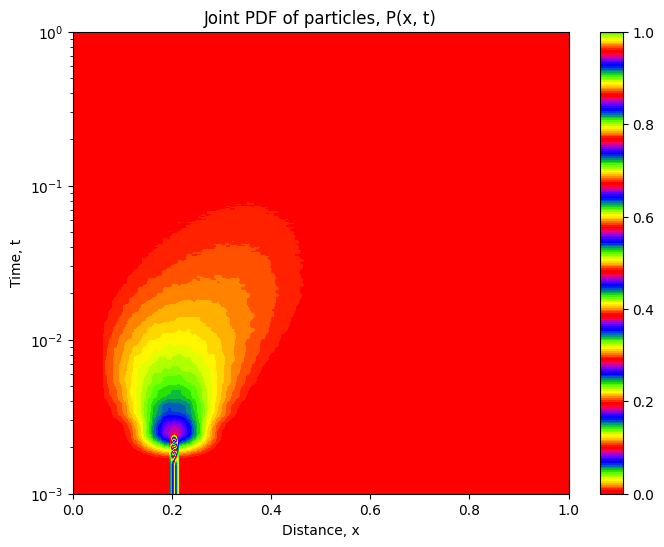

In [6]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [7]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 37.43643641471863 seconds ---


#Plot

Mean First Passage Time =  94.57845827241593


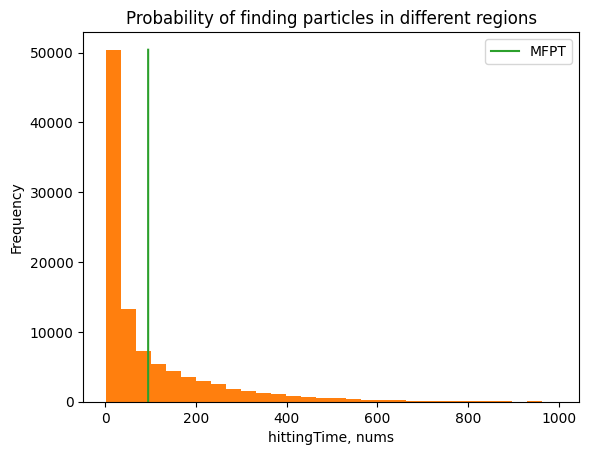

In [8]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

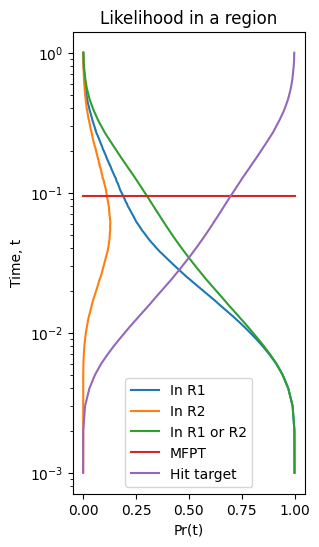

In [9]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

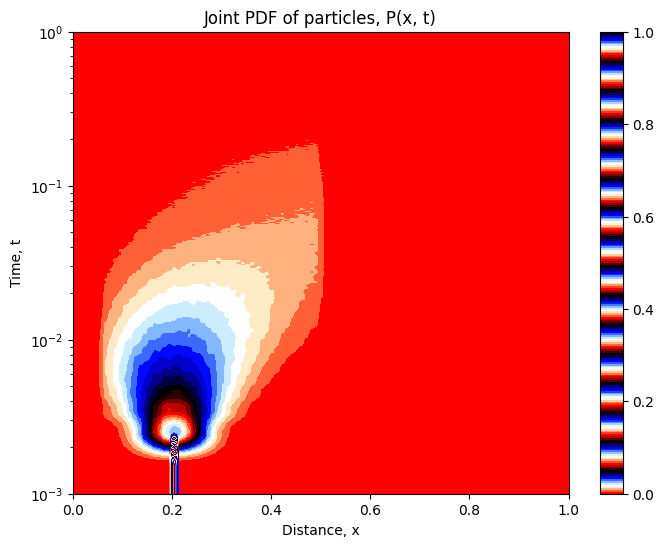

In [10]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

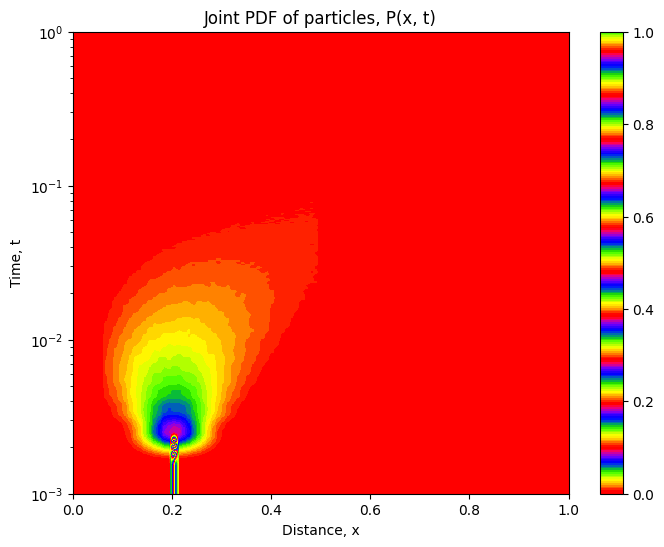

In [11]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [12]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 124.25009250640869 seconds ---


#Plot

Mean First Passage Time =  129.85310260944223


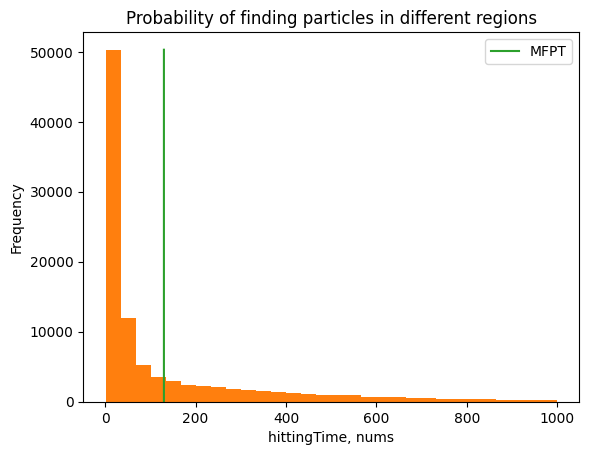

In [13]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

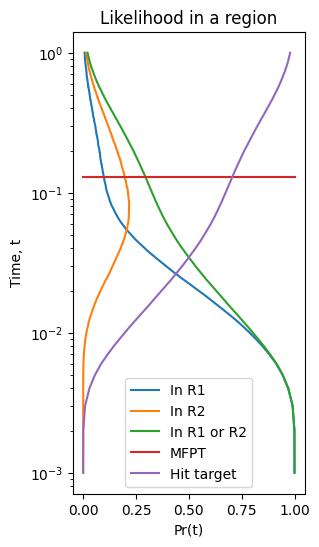

In [14]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

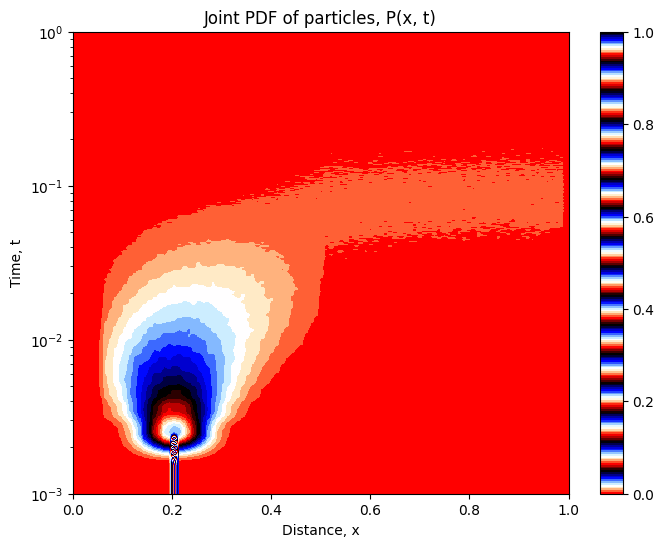

In [15]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

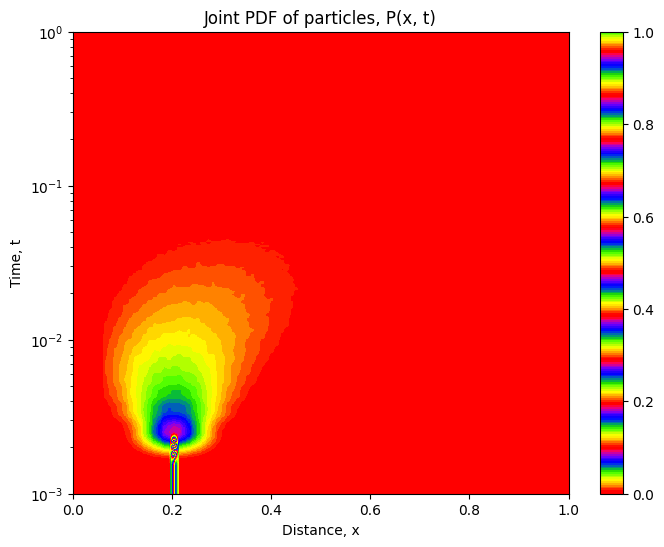

In [16]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 1; D2 = 1.1
___
___

#Simulate Ito Convention

In [17]:
#Diffusivity of inner medium
D1 = 1
#Diffusivity of outer medium
D2 = 1.1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [18]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 24.526068687438965 seconds ---


#Plot

Mean First Passage Time =  67.94414922893712


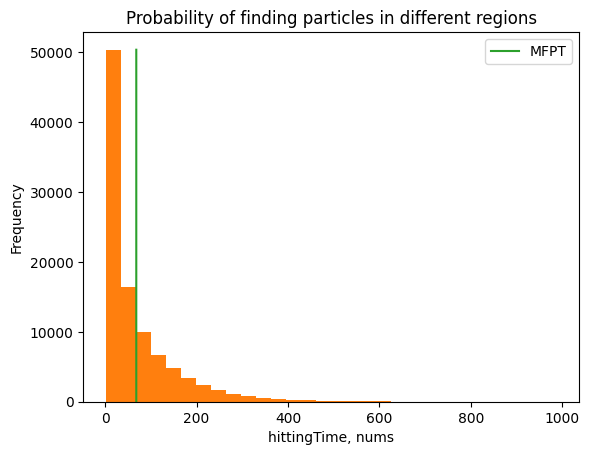

In [19]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

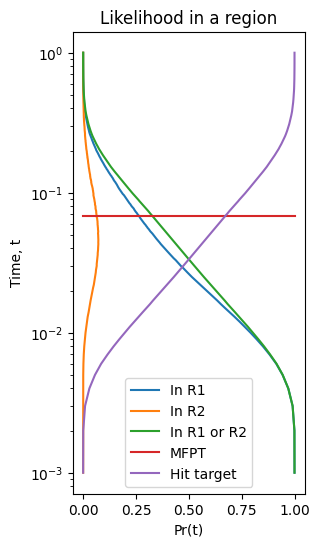

In [20]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

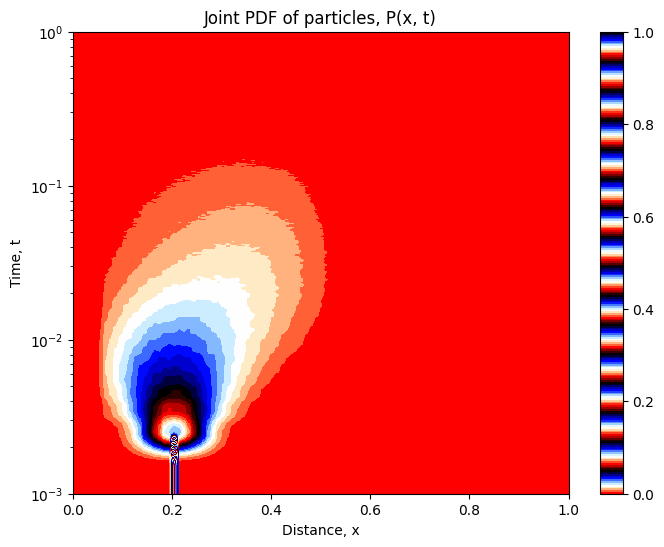

In [21]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

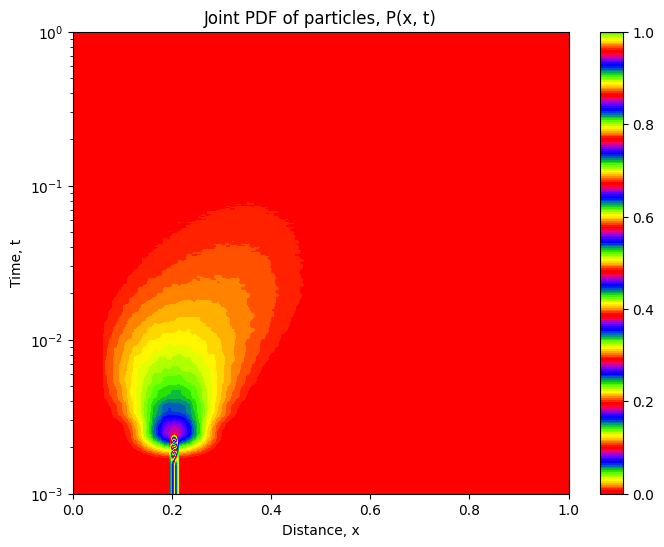

In [22]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [23]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 28.98908019065857 seconds ---


#Plot

Mean First Passage Time =  82.93053846692474


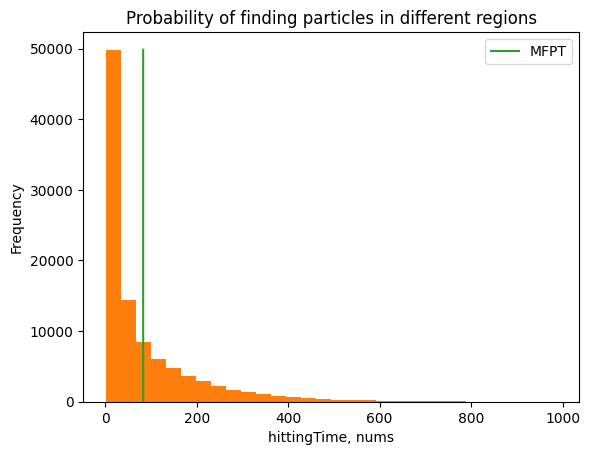

In [24]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

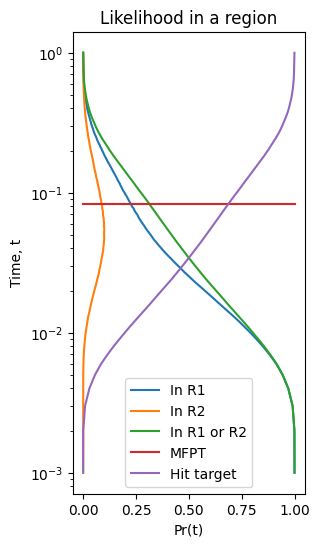

In [25]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

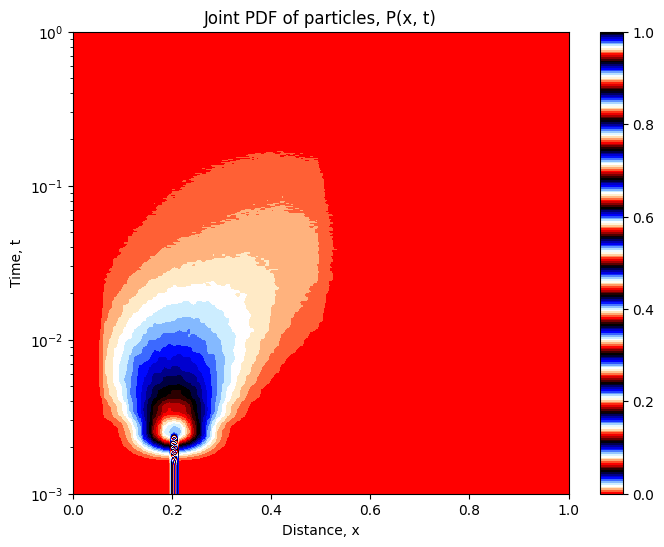

In [26]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

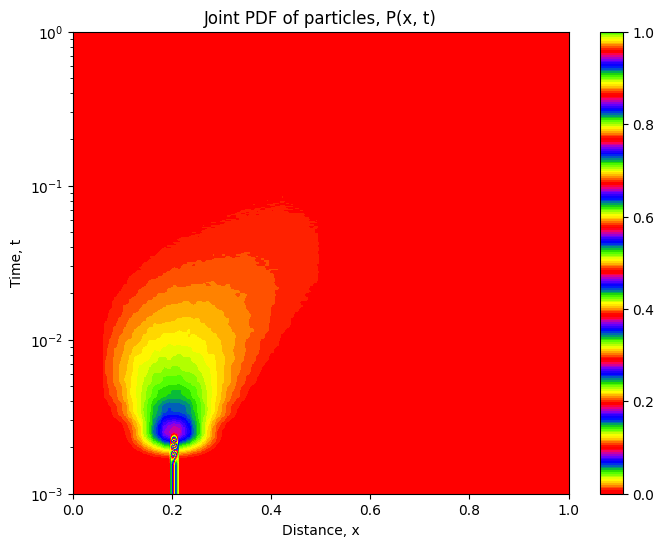

In [27]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [28]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 60.35084128379822 seconds ---


#Plot

Mean First Passage Time =  84.01751542978323


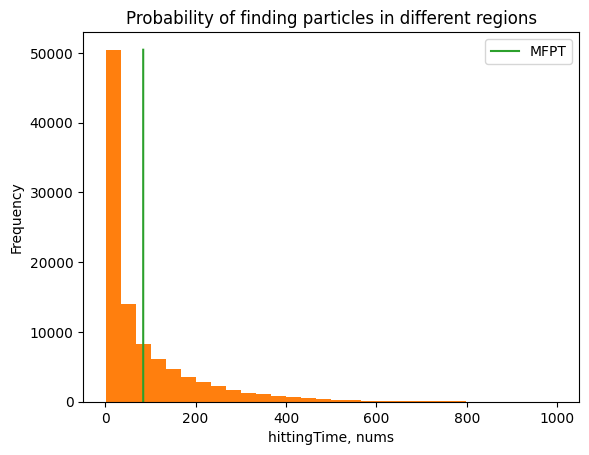

In [29]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

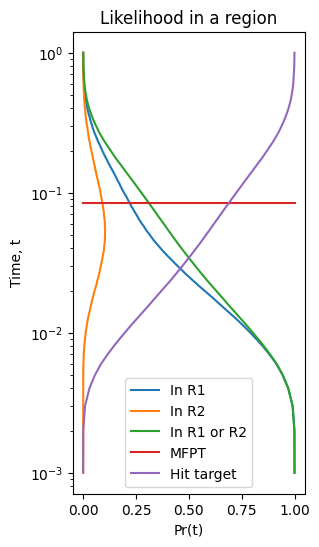

In [30]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

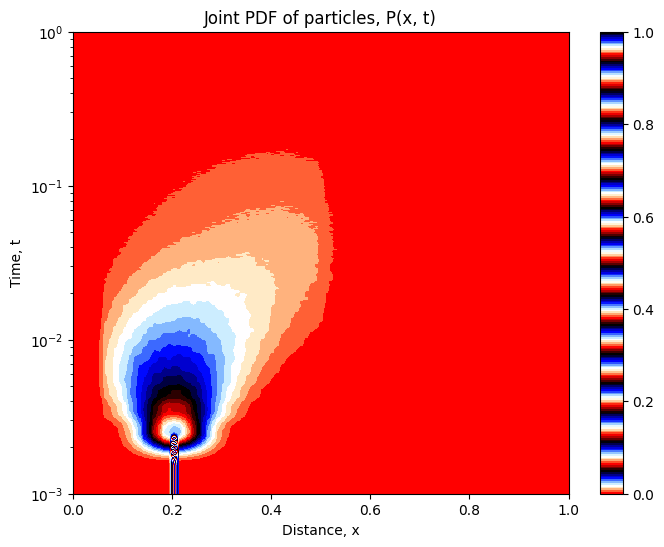

In [31]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

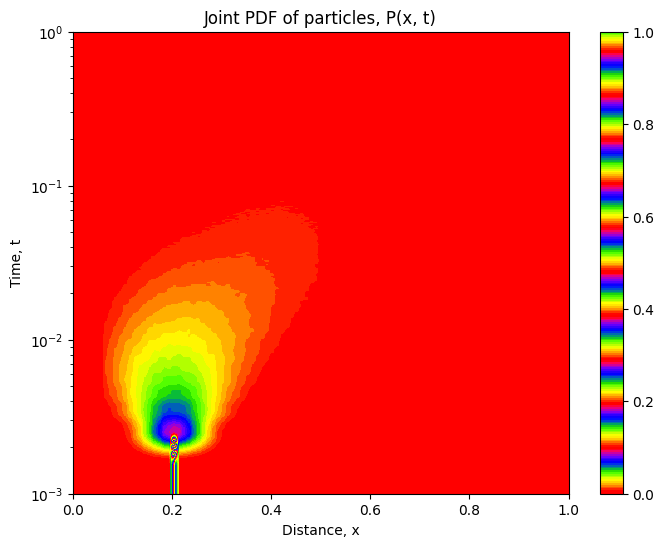

In [32]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 1; D2 = 1
___
___

#Simulate Ito Convention

In [33]:
#Diffusivity of inner medium
D1 = 1
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [34]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 23.500904321670532 seconds ---


#Plot

Mean First Passage Time =  67.94414922893712


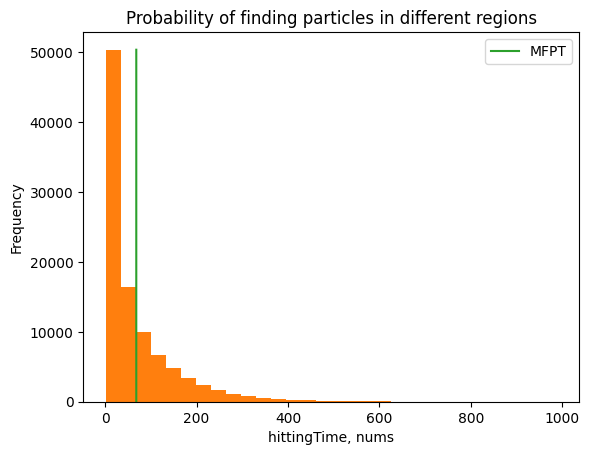

In [35]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

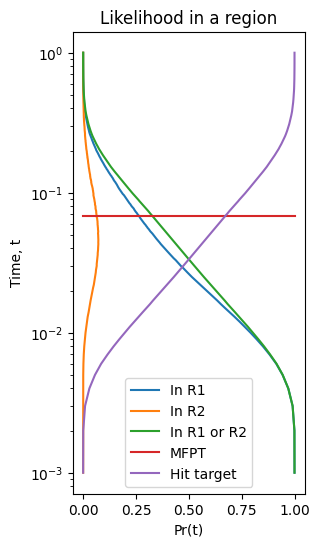

In [36]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

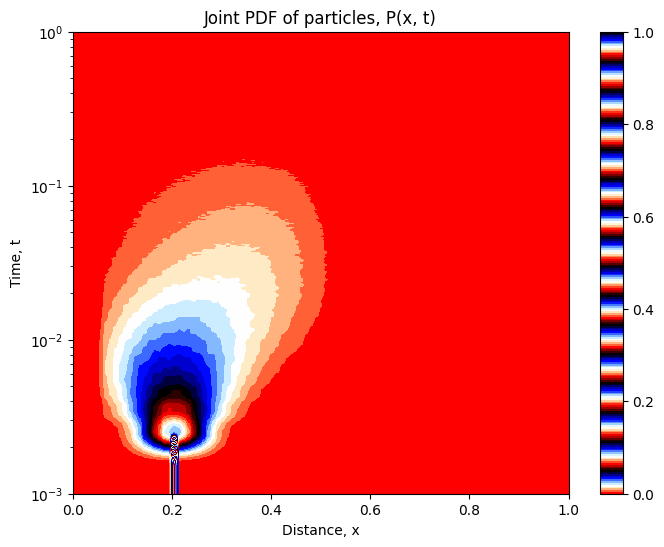

In [37]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

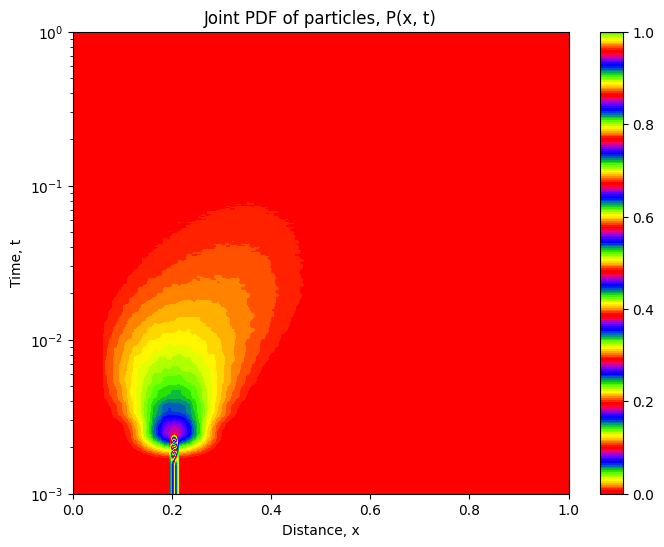

In [38]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [39]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 30.326424598693848 seconds ---


#Plot

Mean First Passage Time =  82.0529216427614


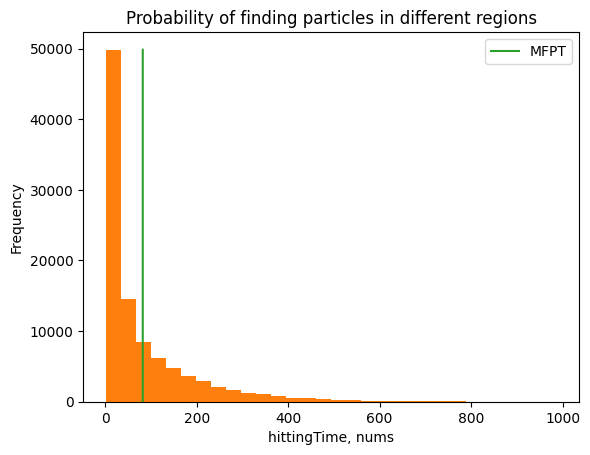

In [40]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

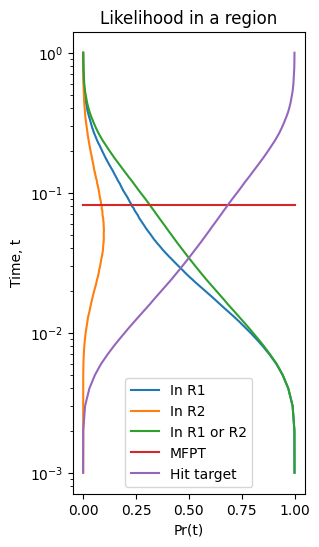

In [41]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

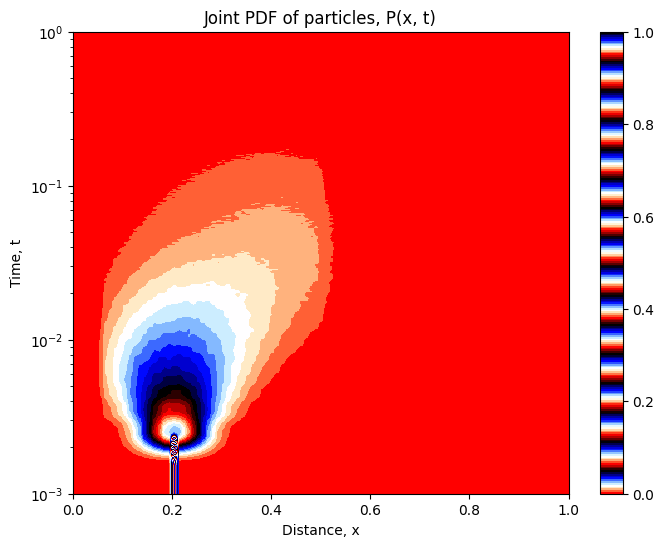

In [42]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

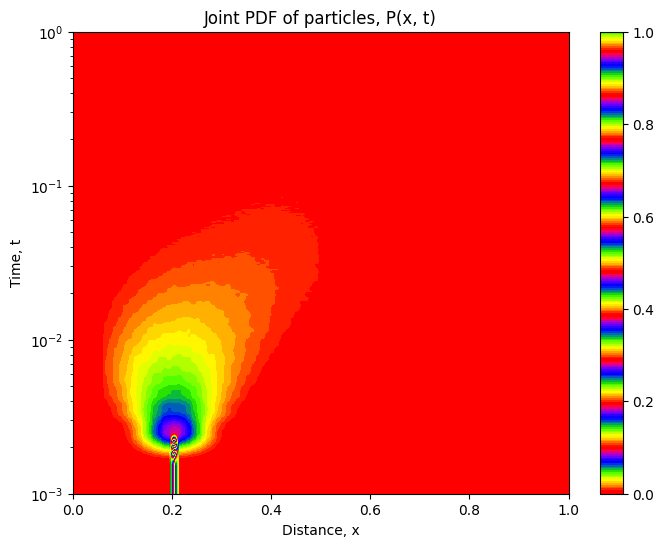

In [43]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [44]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 58.045085191726685 seconds ---


#Plot

Mean First Passage Time =  82.0529216427614


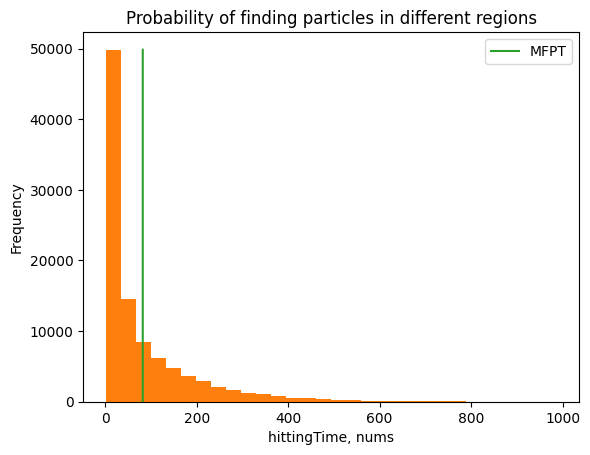

In [45]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

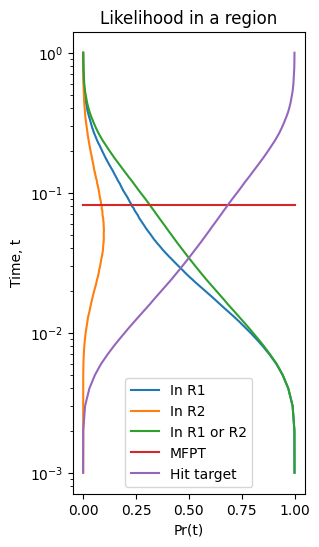

In [46]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

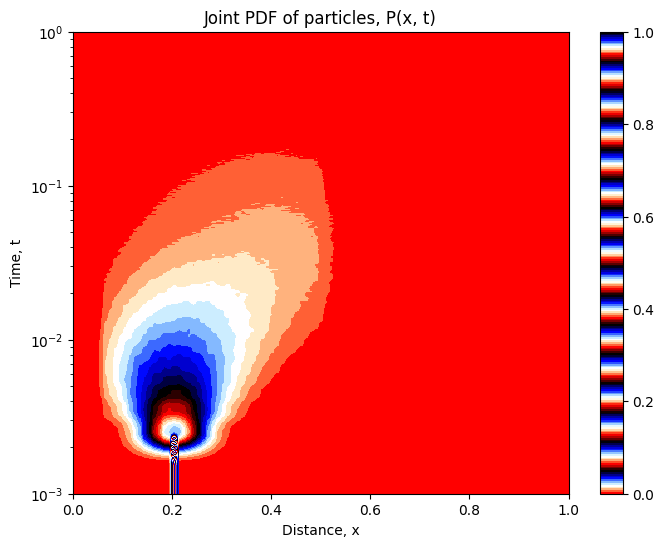

In [47]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

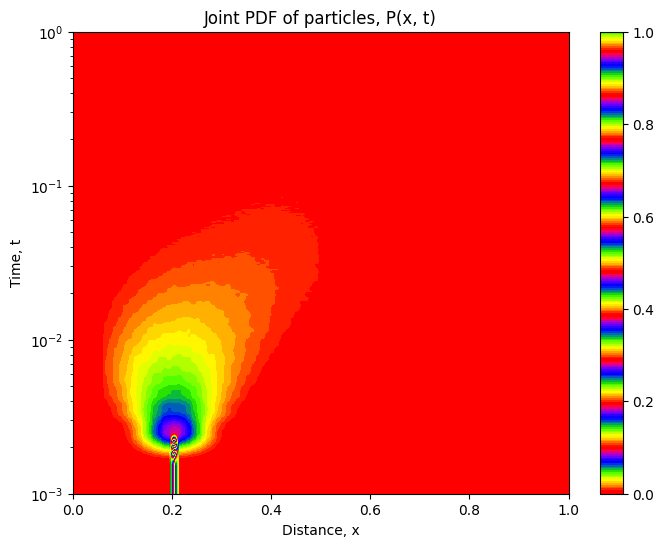

In [48]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 1.1; D2 = 1
___
___

#Simulate Ito Convention

In [49]:
#Diffusivity of inner medium
D1 = 1.1
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [50]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 22.605924606323242 seconds ---


#Plot

Mean First Passage Time =  67.94414922893712


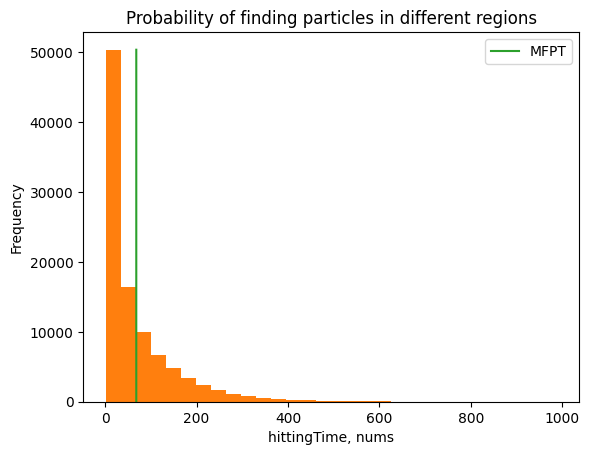

In [51]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

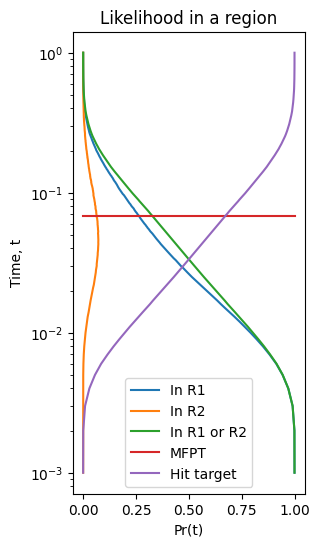

In [52]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

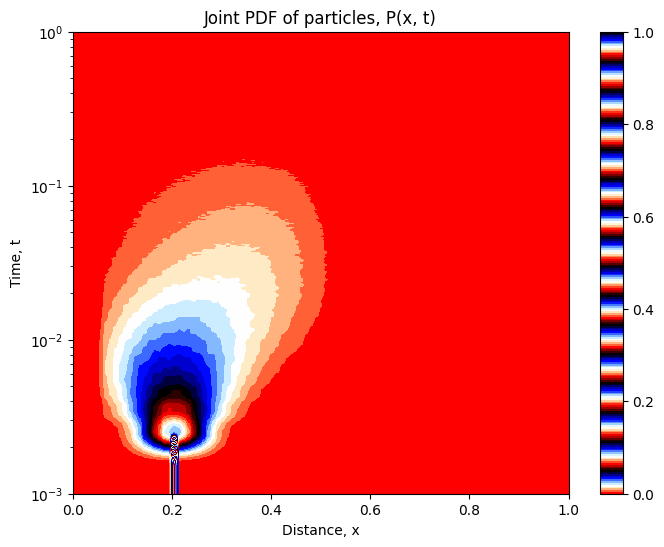

In [53]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

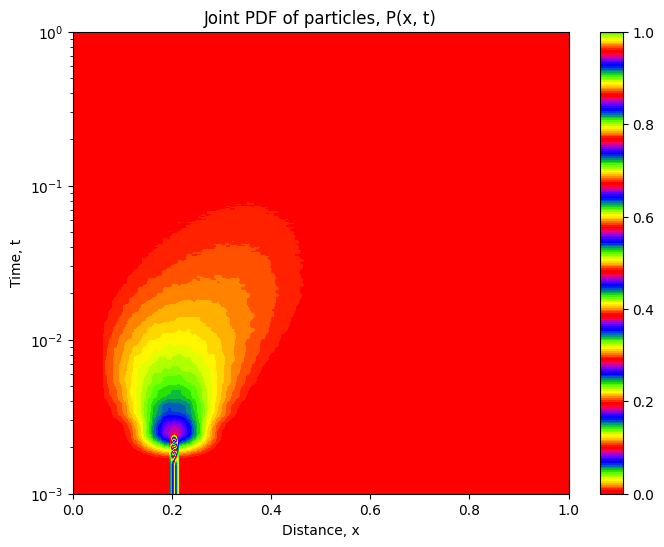

In [54]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [55]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 27.620824813842773 seconds ---


#Plot

Mean First Passage Time =  81.27557062553763


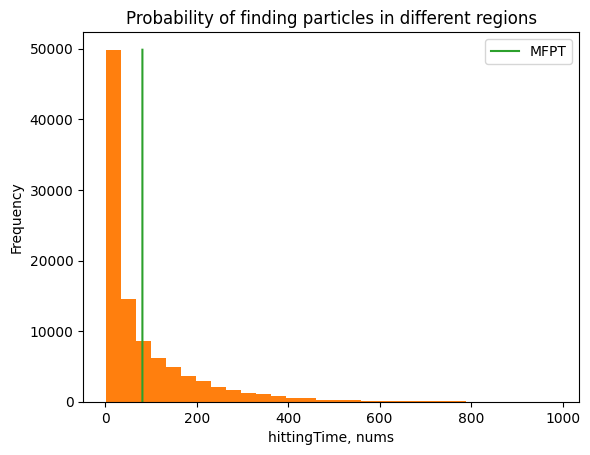

In [56]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

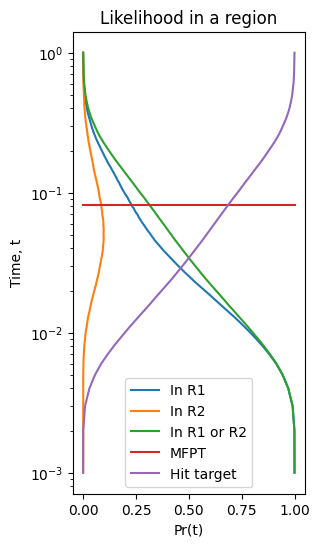

In [57]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

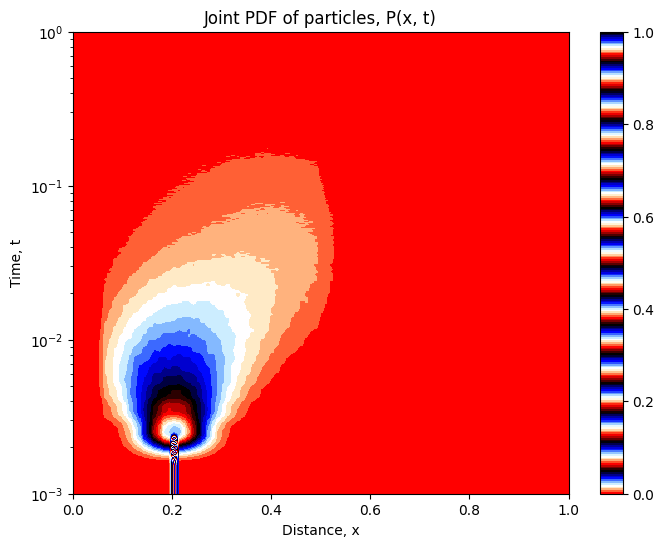

In [58]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

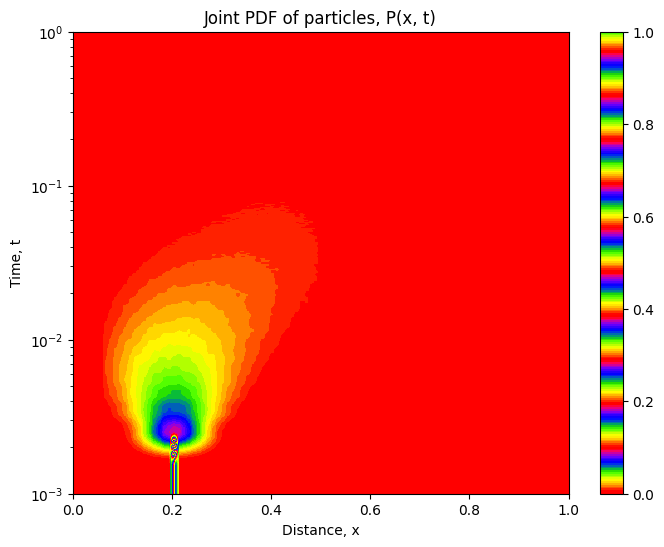

In [59]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [60]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 55.52166271209717 seconds ---


#Plot

Mean First Passage Time =  80.75962952219966


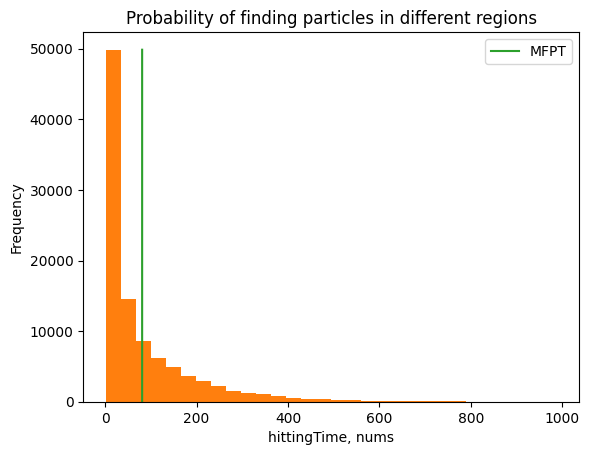

In [61]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

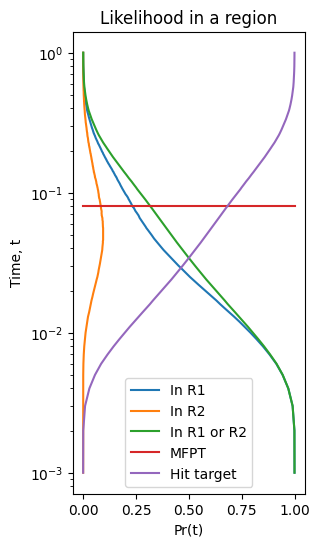

In [62]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

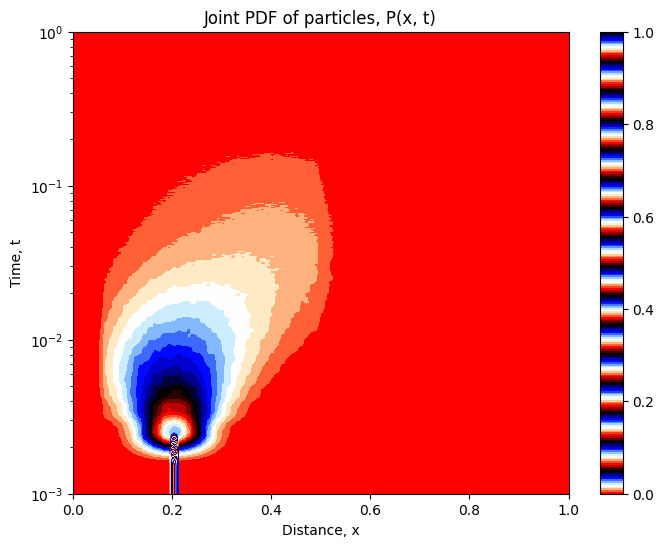

In [63]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

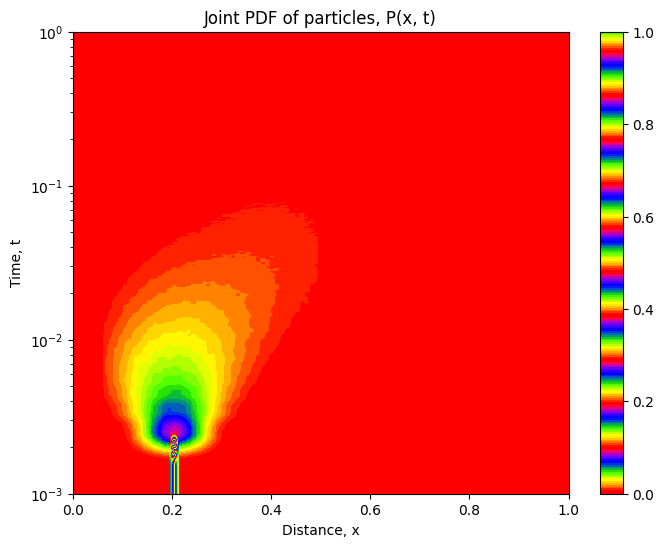

In [64]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 10; D2 = 1
___
___

#Simulate Ito Convention

In [65]:
#Diffusivity of inner medium
D1 = 10
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [66]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 21.874051094055176 seconds ---


#Plot

Mean First Passage Time =  67.94414922893712


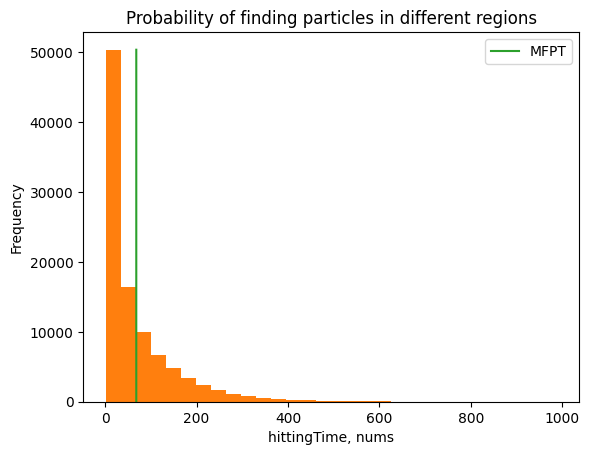

In [67]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

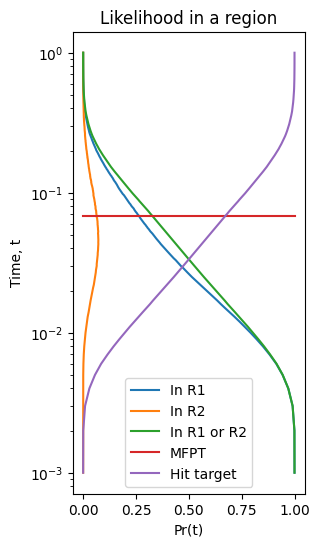

In [68]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

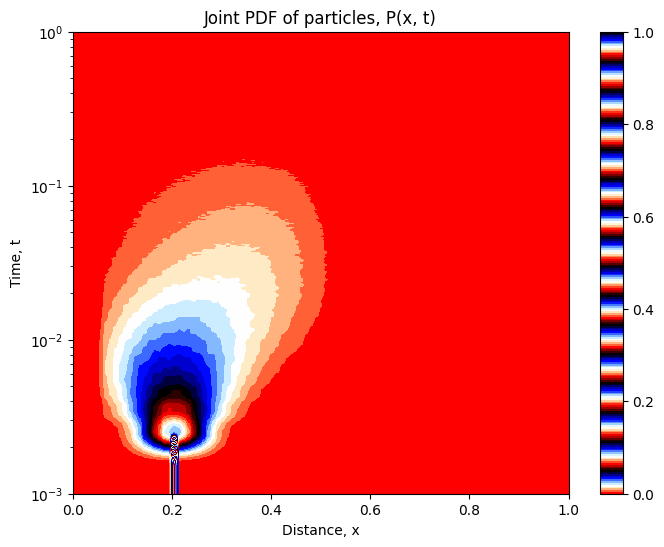

In [69]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

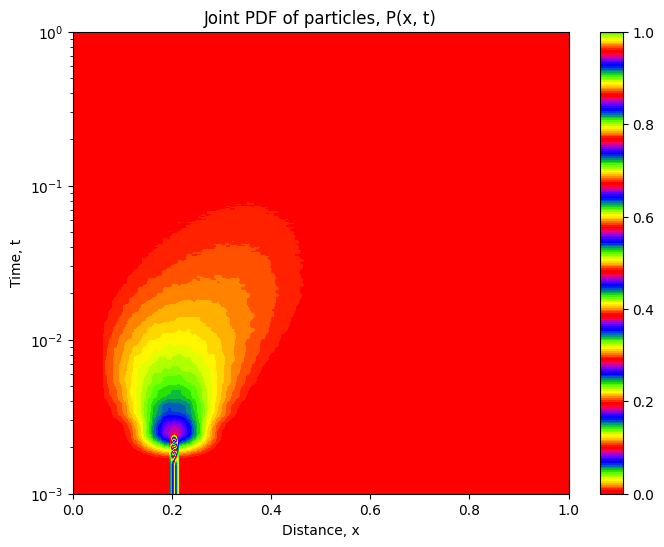

In [70]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [71]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 26.786412715911865 seconds ---


#Plot

Mean First Passage Time =  57.91645446452601


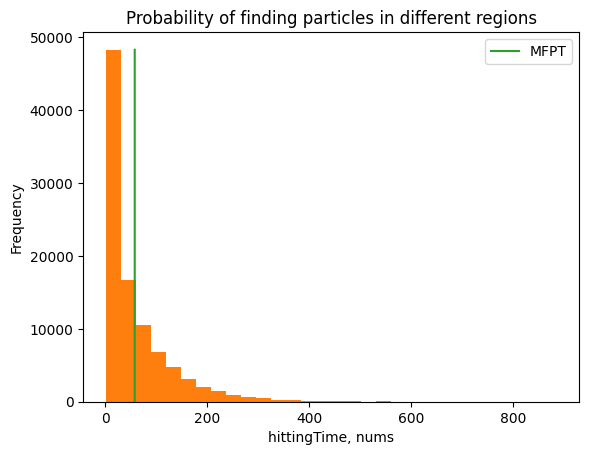

In [72]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

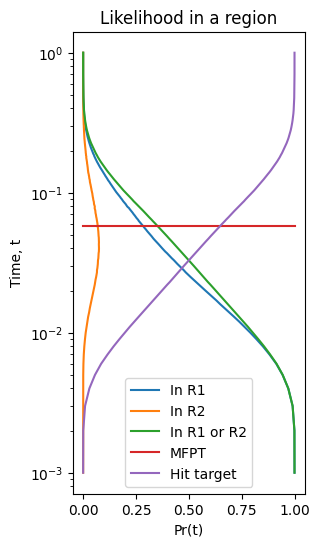

In [73]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

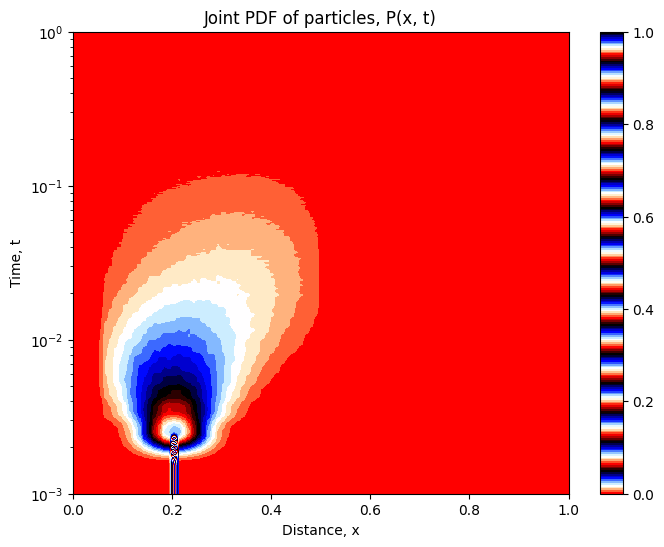

In [74]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

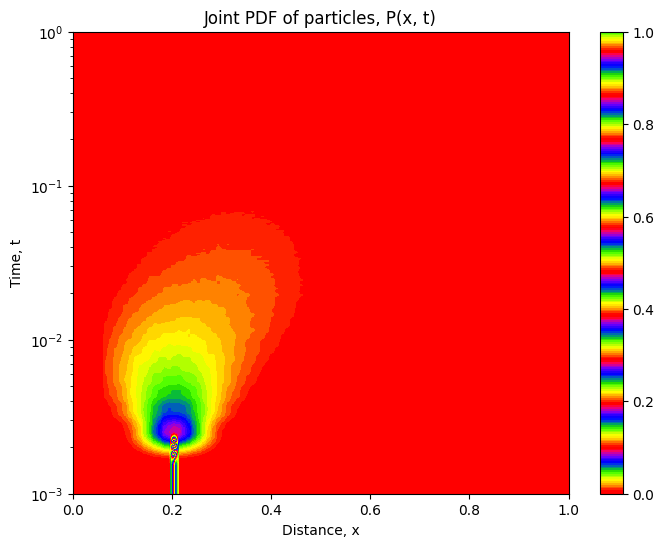

In [75]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [76]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 39.46813082695007 seconds ---


#Plot

Mean First Passage Time =  62.302930798882336


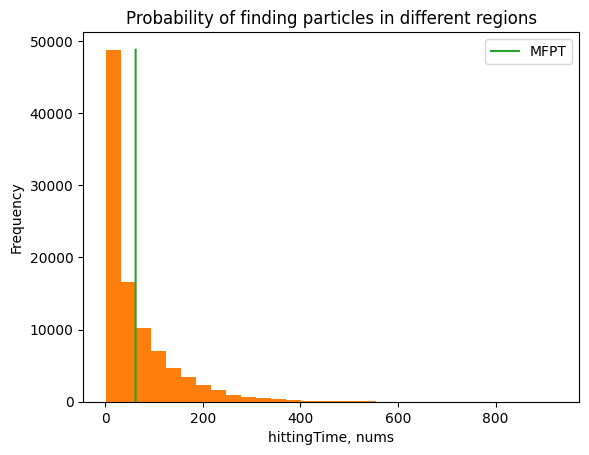

In [77]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

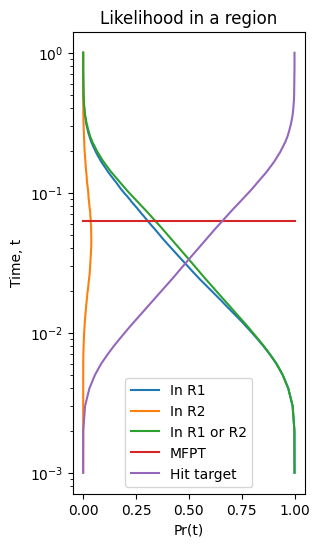

In [78]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

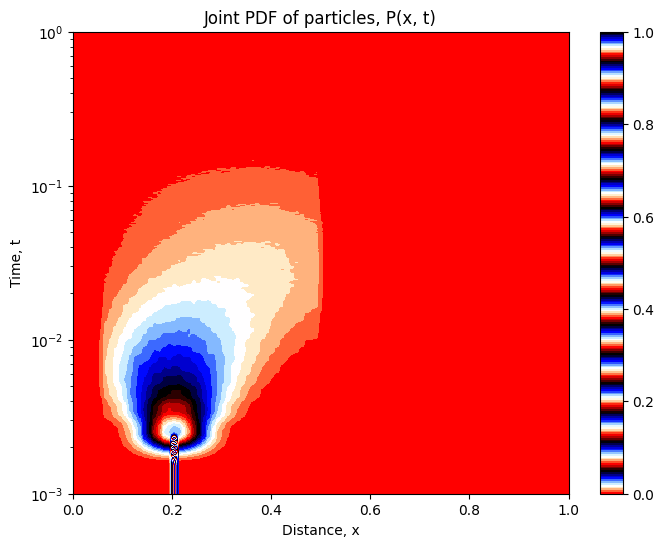

In [79]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

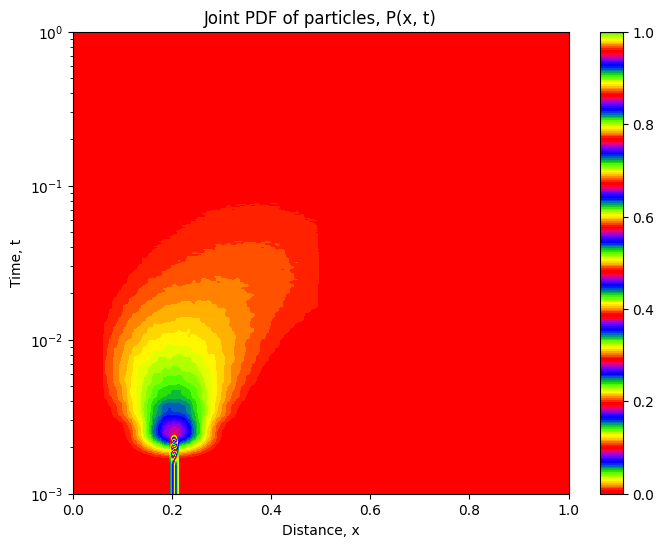

In [80]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 100; D2 = 1
___
___

#Simulate Ito Convention

In [81]:
#Diffusivity of inner medium
D1 = 100
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [82]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 22.206738233566284 seconds ---


#Plot

Mean First Passage Time =  67.94414922893712


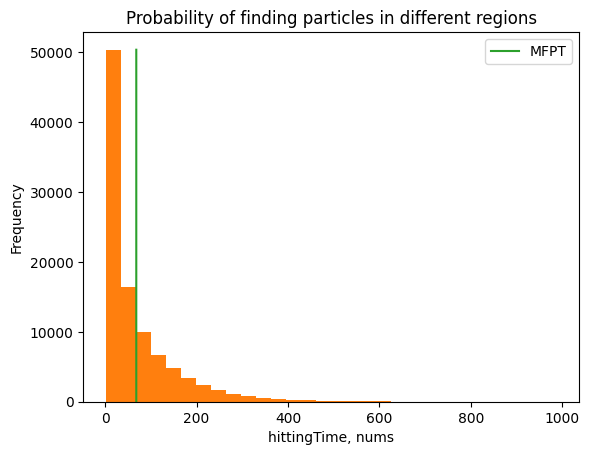

In [83]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

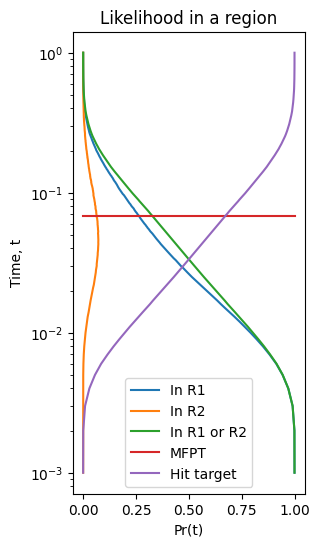

In [84]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

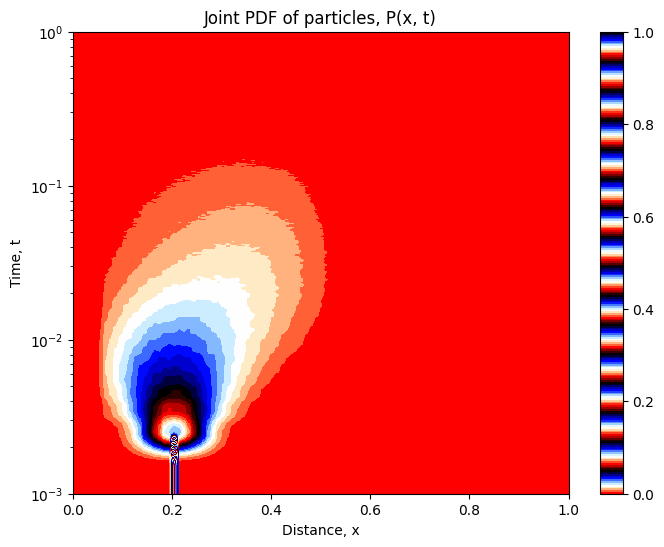

In [85]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

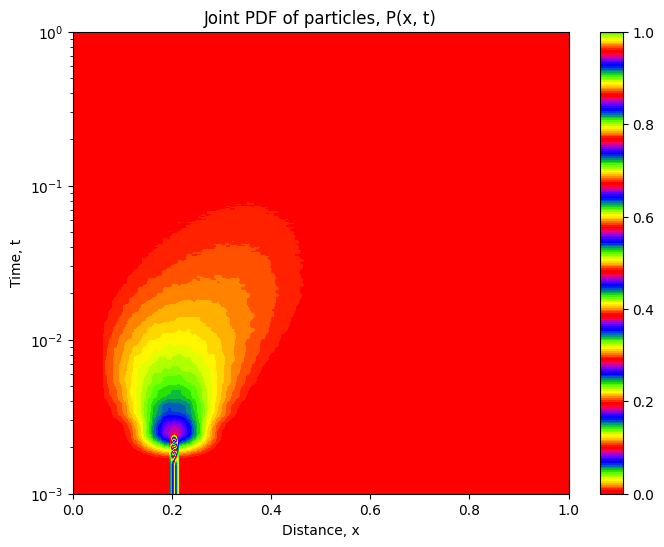

In [86]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [87]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 51.88605761528015 seconds ---


#Plot

Mean First Passage Time =  38.823612004914295


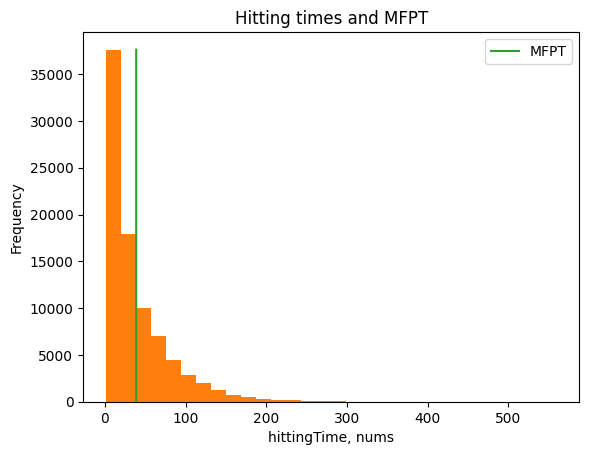

In [88]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()

plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

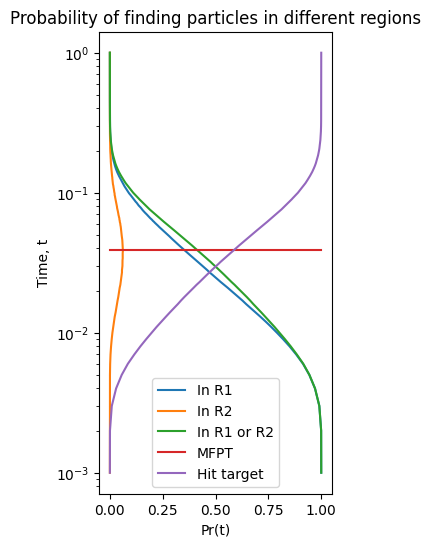

In [89]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

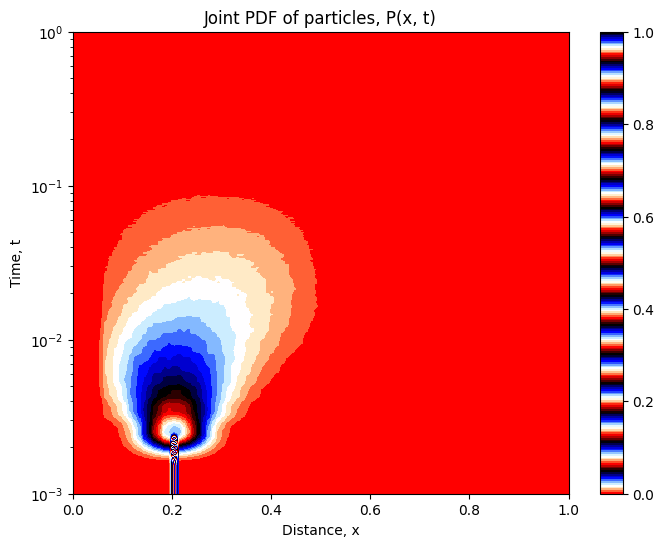

In [90]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

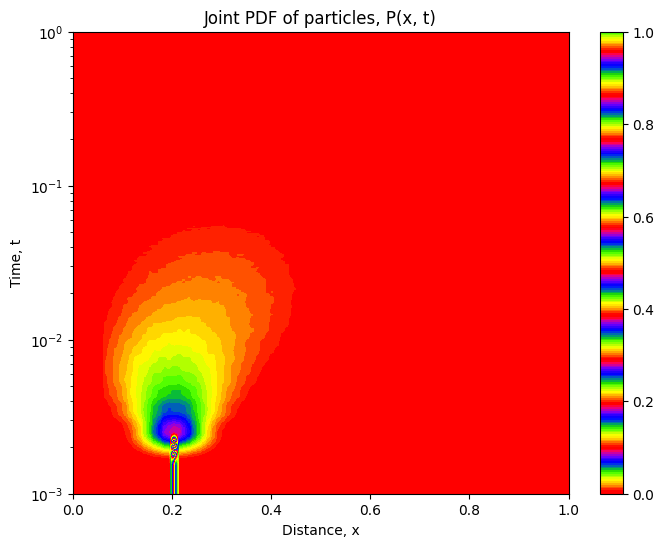

In [91]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [92]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 46.184460401535034 seconds ---


#Plot

Mean First Passage Time =  56.016328781067095


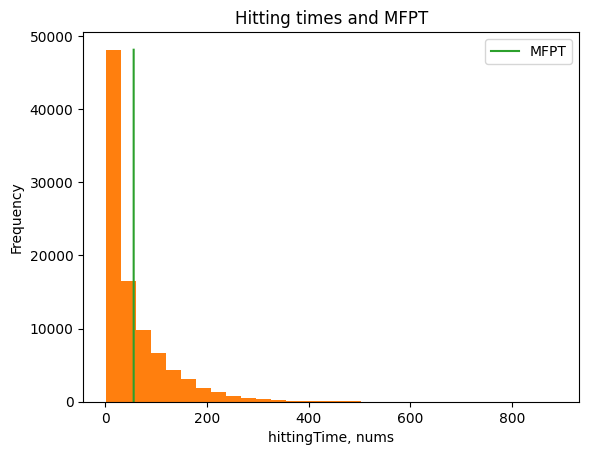

In [93]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()

plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

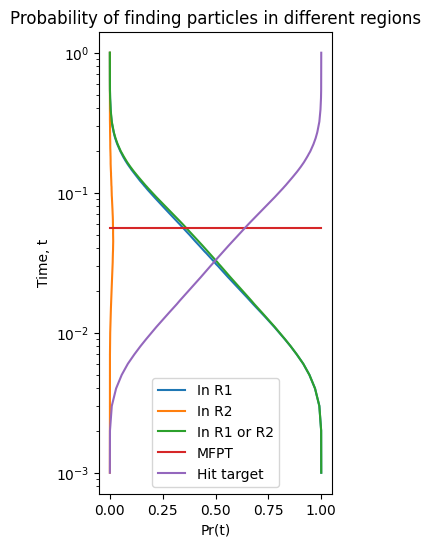

In [94]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

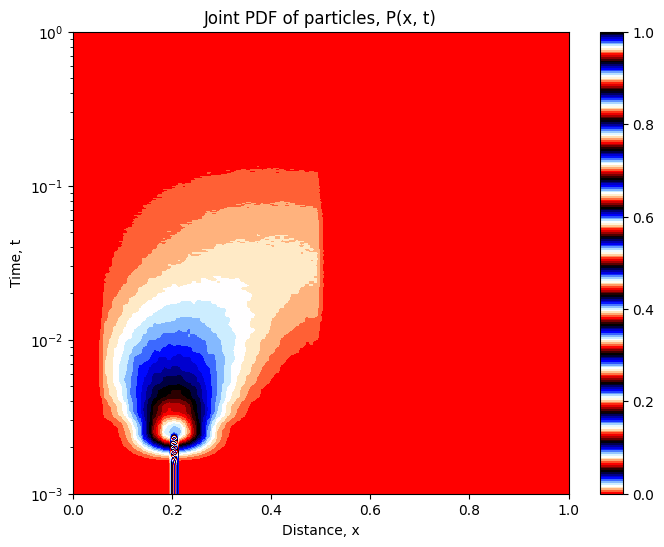

In [95]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

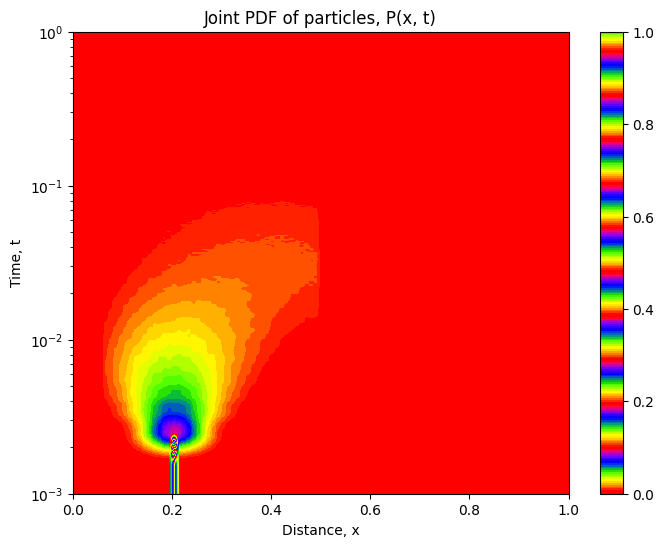

In [96]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#Miscelleneous

Mean First Passage Time =  56.016328781067095


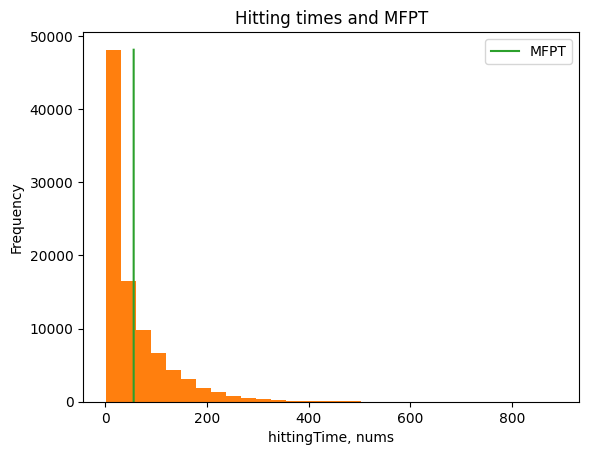

In [97]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.show()
#plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_10_1.png')

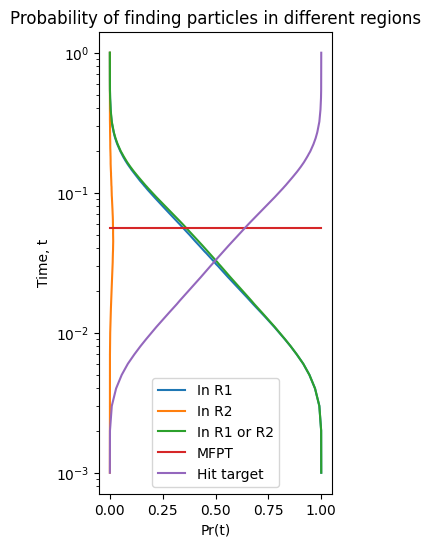

In [98]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")
plt.title("Probability of finding particles in different regions")
#plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_10_1.png')
plt.show()

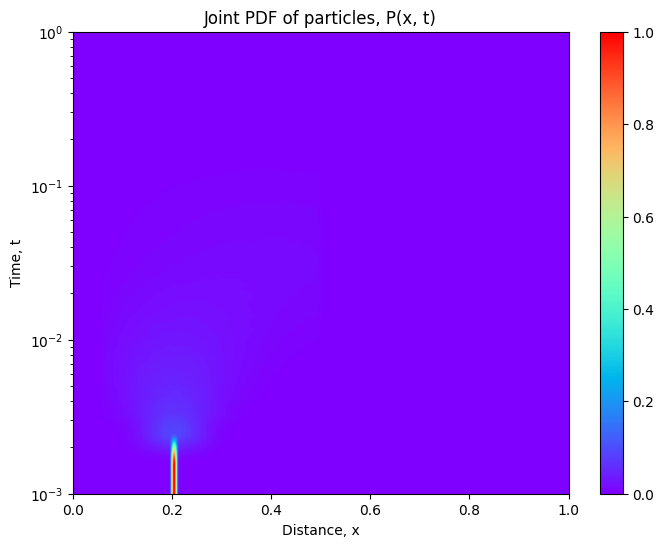

In [99]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'rainbow', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_rainbow.png')

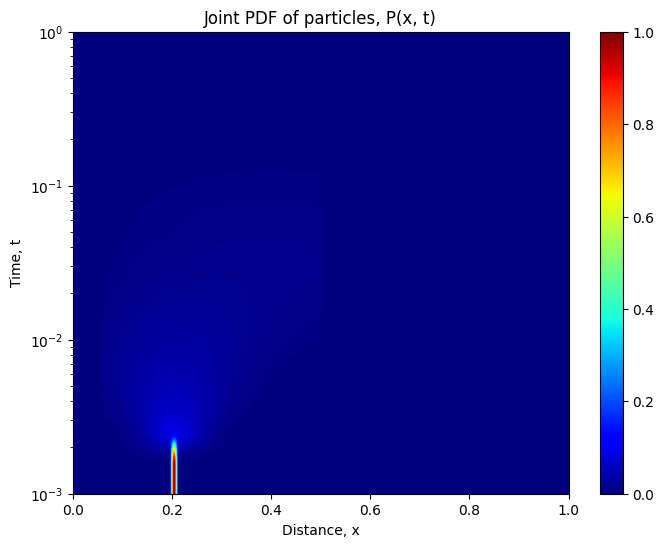

In [100]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'jet', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_jet.png')

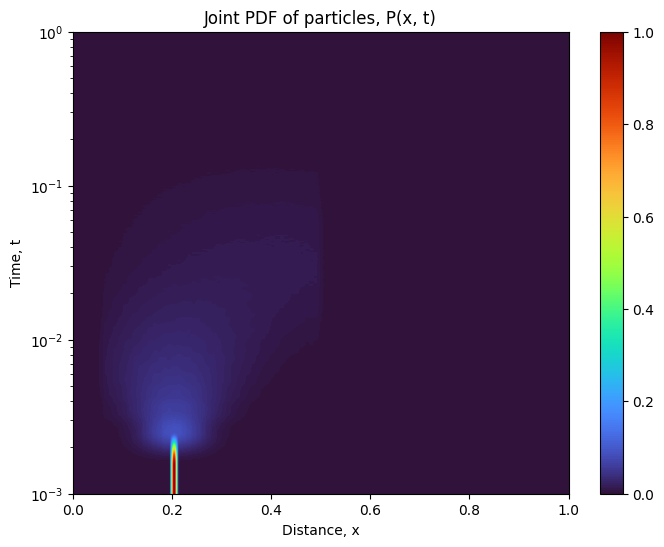

In [101]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'turbo', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_turbo.png')

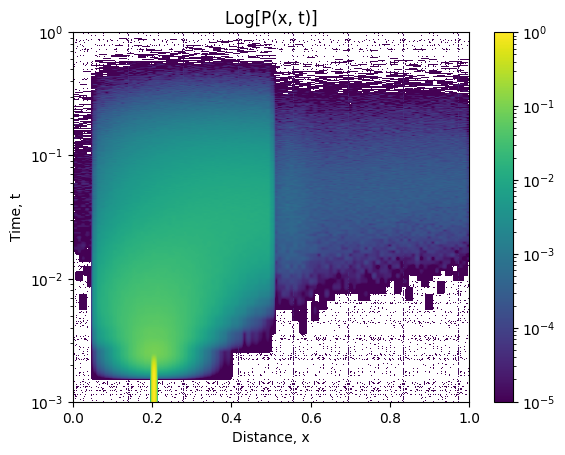

In [102]:
#Plot the heatmap of log of pdf
plt.title("Log[P(x, t)]")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), extent = [0, 1, dt, dt*nums], aspect = "auto", norm='log')
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_Log.png')

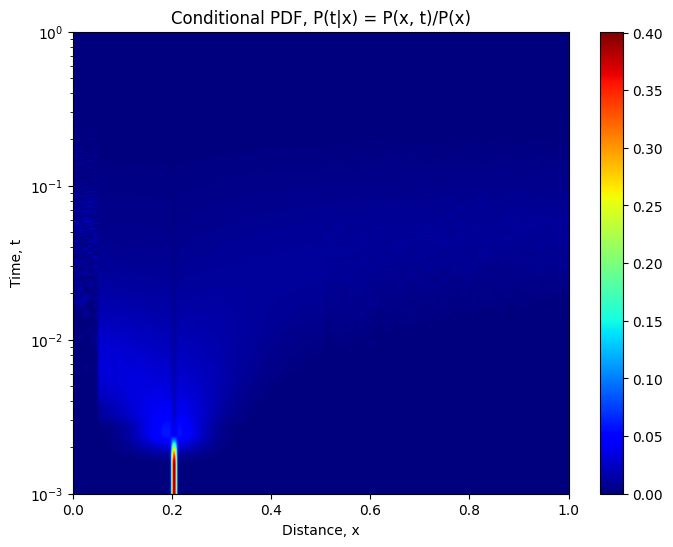

In [103]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(t|x) = P(x, t)/P(x)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[:, p])


#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(t|x) = P(x, t)/P(x)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap= 'jet')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_jet.png')

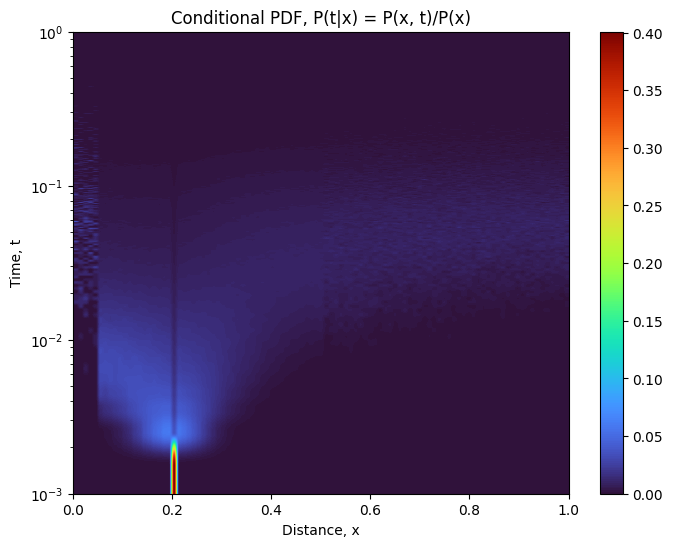

In [104]:
#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(t|x) = P(x, t)/P(x)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap= 'turbo')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_turbo.png')

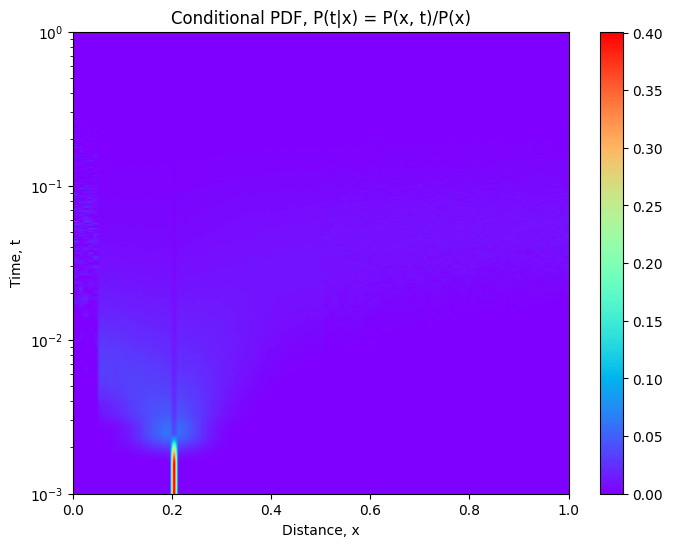

In [105]:
#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(t|x) = P(x, t)/P(x)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap= 'rainbow')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_rainbow.png')

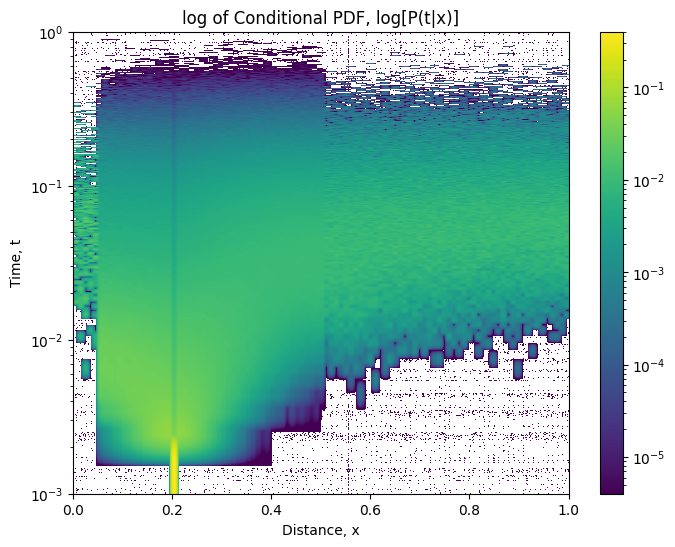

In [106]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(t|x) = P(x, t)/P(x)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[:, p])


#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("log of Conditional PDF, log[P(t|x)]")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", norm= 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_log.png')

<ipython-input-107-4934a332f0e7>:9: RuntimeWarning: invalid value encountered in double_scalars
  condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[t, :])


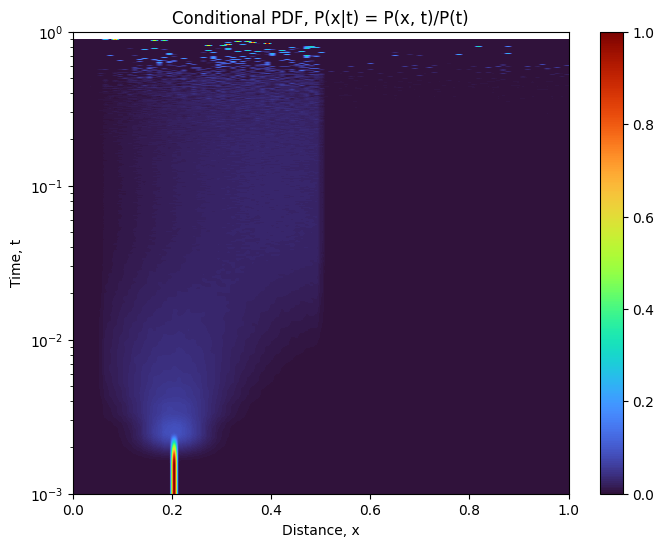

In [107]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(x|t) = P(x, t)/P(t)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[t, :])


#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(x|t) = P(x, t)/P(t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'turbo')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_turbo.png')

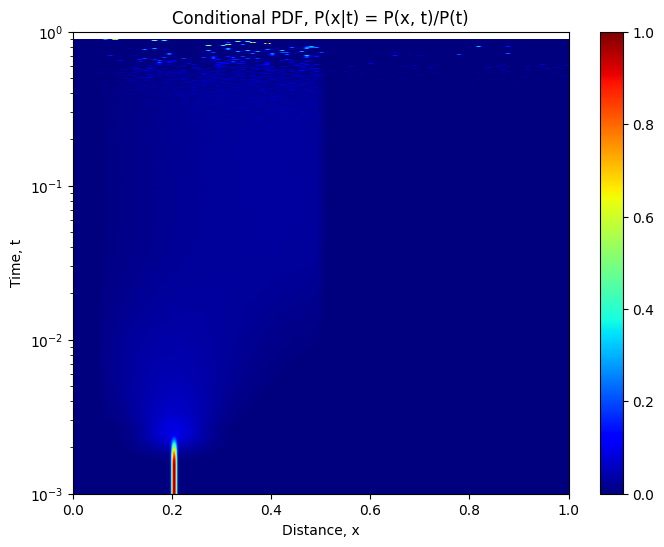

In [108]:
#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(x|t) = P(x, t)/P(t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'jet')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_jet.png')

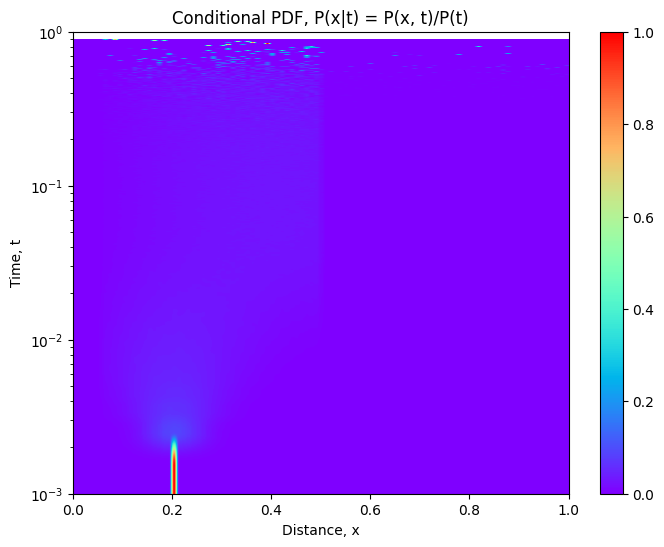

In [109]:
#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(x|t) = P(x, t)/P(t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'rainbow')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_rainbow.png')

<ipython-input-110-9e4703e25e3a>:9: RuntimeWarning: invalid value encountered in double_scalars
  condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[t, :])


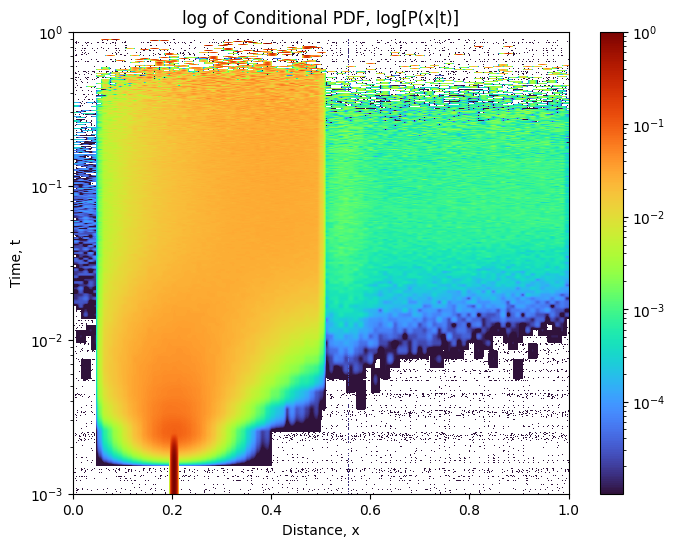

In [110]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(x|t) = P(x, t)/P(t)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[t, :])


#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("log of Conditional PDF, log[P(x|t)]")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'turbo', norm = 'log')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_log.png')

https://stackoverflow.com/questions/18266642/multiple-imshow-subplots-each-with-colorbar